In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

<font size="3">Salem, MO: 1000 UTC 5 April 2022-1000 UTC 6 April 2022</font>

In [2]:
#1 hr hrrr:
with open('hrrr_f01_Salem_MO.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.222, 0.222, 0.222, 0.222, 0.222, 0.221, 0.221, 0.219, 0.218, 0.217, 0.216, 0.22, 0.219, 0.22, 0.22, 0.218, 0.217, 0.216, 0.216, 0.216, 0.22, 0.223, 0.223, 0.223, 0.222]
25


In [3]:
#Air Temp CRN:
with open('CRNH0203-2022-MO_Salem_10_W.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2265:2290]
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.317, 0.317, 0.317, 0.317, 0.317, 0.317, 0.316, 0.316, 0.315, 0.315, 0.314, 0.314, 0.313, 0.314, 0.314, 0.313, 0.313, 0.313, 0.314, 0.314, 0.313, 0.314, 0.314, 0.315, 0.315]


In [4]:
hour=[]
for i in range(-12,13,1):
    hour.append(i)
    i+=1
print(len(hour))

25


In [5]:
difference_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_sal.append(temp_i-temp_crn_i)

print(difference_sal)

[-0.095, -0.095, -0.095, -0.095, -0.095, -0.096, -0.095, -0.097, -0.097, -0.098, -0.098, -0.094, -0.094, -0.094, -0.094, -0.095, -0.096, -0.097, -0.098, -0.098, -0.093, -0.091, -0.091, -0.092, -0.093]


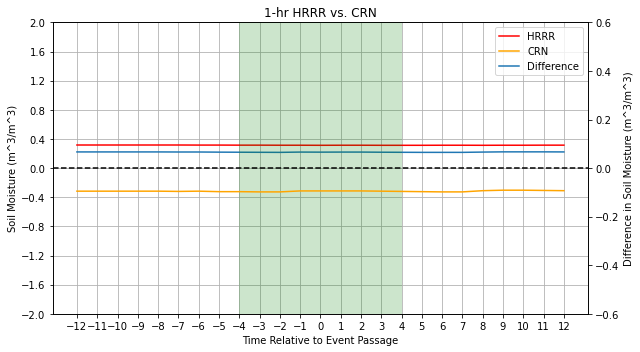

In [6]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_sal, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [7]:
#3 hr hrrr:
with open('hrrr_f03_Salem_MO.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.222, 0.222, 0.222, 0.222, 0.222, 0.221, 0.22, 0.219, 0.218, 0.217, 0.216, 0.215, 0.215, 0.219, 0.218, 0.22, 0.22, 0.216, 0.216, 0.216, 0.238, 0.25, 0.223, 0.223, 0.223]


In [8]:
diff3_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_sal.append(temp_i-temp_crn_i)

print(diff3_sal)

[-0.095, -0.095, -0.095, -0.095, -0.095, -0.096, -0.096, -0.097, -0.097, -0.098, -0.098, -0.099, -0.098, -0.095, -0.096, -0.093, -0.093, -0.097, -0.098, -0.098, -0.07500000000000001, -0.064, -0.091, -0.092, -0.092]


In [9]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='yellow', alpha=0.2, lw=0)
# plt.show()

In [10]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",salem3)

In [11]:
#6 hr hrrr:
with open('hrrr_f06_Salem_MO.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2260:2285]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.24, 0.222, 0.224, 0.222, 0.222, 0.222, 0.22, 0.219, 0.218, 0.217, 0.216, 0.215, 0.215, 0.214, 0.214, 0.214, 0.217, 0.216, 0.22, 0.22, 0.231, 0.24, 0.222, 0.244, 0.249]


In [12]:
diff6_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_sal.append(temp_i-temp_crn_i)

print(diff6_sal)

[-0.07700000000000001, -0.095, -0.093, -0.095, -0.095, -0.095, -0.096, -0.097, -0.097, -0.098, -0.098, -0.099, -0.098, -0.1, -0.1, -0.099, -0.096, -0.097, -0.094, -0.094, -0.08199999999999999, -0.07400000000000001, -0.092, -0.07100000000000001, -0.066]


In [13]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [14]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",salem6)

In [15]:
#12 hr hrrr:
with open('hrrr_f12_Salem_MO.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2254:2279]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.25, 0.23, 0.222, 0.243, 0.228, 0.237, 0.236, 0.219, 0.22, 0.218, 0.216, 0.216, 0.214, 0.214, 0.214, 0.214, 0.213, 0.213, 0.213, 0.213, 0.28, 0.261, 0.274, 0.267, 0.26]
25


In [16]:
diff12_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_sal.append(temp_i-temp_crn_i)

print(diff12_sal)

[-0.067, -0.087, -0.095, -0.07400000000000001, -0.089, -0.08000000000000002, -0.08000000000000002, -0.097, -0.095, -0.097, -0.098, -0.098, -0.099, -0.1, -0.1, -0.099, -0.1, -0.1, -0.101, -0.101, -0.032999999999999974, -0.05299999999999999, -0.03999999999999998, -0.04799999999999999, -0.05499999999999999]


In [17]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [18]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",salem12)

In [19]:
#18 hr hrrr:
with open('hrrr_f18_Salem_MO.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2248:2273]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.247, 0.24, 0.232, 0.236, 0.248, 0.228, 0.24, 0.22, 0.219, 0.227, 0.219, 0.222, 0.221, 0.214, 0.215, 0.214, 0.214, 0.213, 0.211, 0.214, 0.282, 0.311, 0.297, 0.263, 0.28]


In [20]:
diff18_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_sal.append(temp_i-temp_crn_i)

print(diff18_sal)

[-0.07, -0.07700000000000001, -0.08499999999999999, -0.08100000000000002, -0.069, -0.089, -0.07600000000000001, -0.096, -0.096, -0.088, -0.095, -0.092, -0.092, -0.1, -0.099, -0.099, -0.099, -0.1, -0.10300000000000001, -0.1, -0.031000000000000028, -0.0030000000000000027, -0.017000000000000015, -0.05199999999999999, -0.034999999999999976]


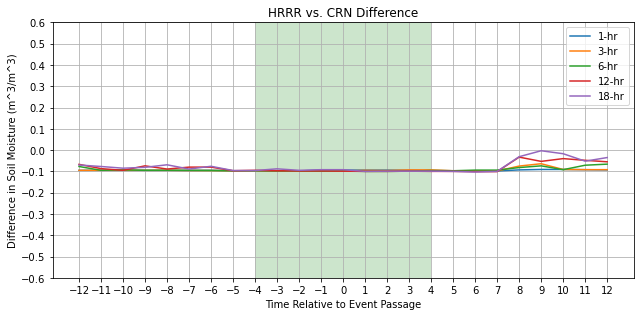

In [21]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sal,label="1-hr")
plt.plot(hour,diff3_sal,label="3-hr")
plt.plot(hour,diff6_sal,label="6-hr")
plt.plot(hour,diff12_sal,label="12-hr")
plt.plot(hour,diff18_sal,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

In [22]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",salem18)

<font size="3">Batesville, AR: 1000 UTC 5 April 2022-1000 UTC 6 April 2022</font>

In [23]:
#1 hr hrrr:
with open('hrrr_f01_Batesville_AR.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.23, 0.236, 0.238, 0.238, 0.237, 0.236, 0.234, 0.231, 0.226, 0.223, 0.221, 0.219, 0.217, 0.22, 0.21, 0.213, 0.212, 0.212, 0.211, 0.211, 0.211, 0.212, 0.251, 0.299, 0.29]


In [24]:
#Air Temp CRN:
with open('CRNH0203-2022-AR_Batesville_8_WNW.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2265:2290]
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.297, 0.33, 0.356, 0.357, 0.357, 0.356, 0.355, 0.353, 0.35, 0.346, 0.343, 0.339, 0.335, 0.333, 0.331, 0.329, 0.328, 0.327, 0.327, 0.326, 0.325, 0.324, 0.34, 0.393, 0.379]


In [25]:
difference_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_bat.append(temp_i-temp_crn_i)

print(difference_bat)

[-0.06699999999999998, -0.09400000000000003, -0.118, -0.119, -0.12, -0.12, -0.12099999999999997, -0.12199999999999997, -0.12399999999999997, -0.12299999999999997, -0.12200000000000003, -0.12000000000000002, -0.11800000000000002, -0.11300000000000002, -0.12100000000000002, -0.11600000000000002, -0.11600000000000002, -0.11500000000000002, -0.11600000000000002, -0.11500000000000002, -0.11400000000000002, -0.11200000000000002, -0.08900000000000002, -0.09400000000000003, -0.08900000000000002]


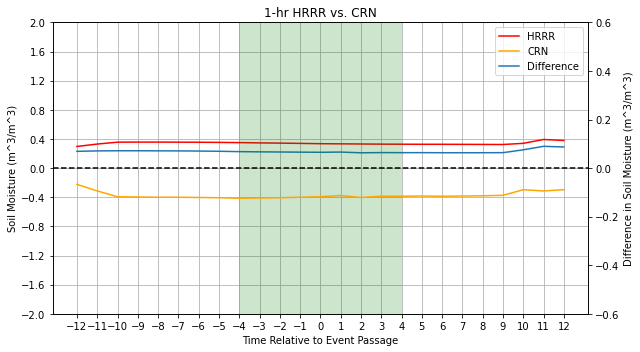

In [26]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_bat, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [27]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [28]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",batesville1)

In [29]:
#3 hr hrrr:
with open('hrrr_f03_Batesville_AR.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.221, 0.229, 0.232, 0.238, 0.321, 0.254, 0.234, 0.231, 0.23, 0.226, 0.221, 0.219, 0.217, 0.216, 0.214, 0.21, 0.21, 0.212, 0.211, 0.211, 0.211, 0.212, 0.241, 0.253, 0.269]


In [30]:
diff3_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_bat.append(temp_i-temp_crn_i)

print(diff3_bat)

[-0.07599999999999998, -0.101, -0.12399999999999997, -0.119, -0.035999999999999976, -0.10199999999999998, -0.12099999999999997, -0.12199999999999997, -0.11999999999999997, -0.11999999999999997, -0.12200000000000003, -0.12000000000000002, -0.11800000000000002, -0.11700000000000002, -0.11700000000000002, -0.11900000000000002, -0.11800000000000002, -0.11500000000000002, -0.11600000000000002, -0.11500000000000002, -0.11400000000000002, -0.11200000000000002, -0.09900000000000003, -0.14, -0.10999999999999999]


In [31]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [32]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",batesville3)

In [33]:
#6 hr hrrr:
with open('hrrr_f06_Batesville_AR.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2260:2285]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.235, 0.223, 0.228, 0.231, 0.252, 0.282, 0.248, 0.294, 0.241, 0.226, 0.225, 0.224, 0.221, 0.216, 0.214, 0.213, 0.213, 0.212, 0.21, 0.21, 0.212, 0.212, 0.212, 0.237, 0.264]


In [34]:
diff6_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_bat.append(temp_i-temp_crn_i)

print(diff6_bat)

[-0.062, -0.10700000000000001, -0.12799999999999997, -0.12599999999999997, -0.10499999999999998, -0.07400000000000001, -0.10699999999999998, -0.059, -0.10899999999999999, -0.11999999999999997, -0.11800000000000002, -0.11500000000000002, -0.11400000000000002, -0.11700000000000002, -0.11700000000000002, -0.11600000000000002, -0.11500000000000002, -0.11500000000000002, -0.11700000000000002, -0.11600000000000002, -0.11300000000000002, -0.11200000000000002, -0.12800000000000003, -0.15600000000000003, -0.11499999999999999]


In [35]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [36]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",batesville6)

In [37]:
#12 hr hrrr:
with open('hrrr_f12_Batesville_AR.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2254:2279]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.23, 0.23, 0.229, 0.227, 0.233, 0.227, 0.235, 0.223, 0.224, 0.223, 0.234, 0.247, 0.23, 0.277, 0.228, 0.215, 0.217, 0.219, 0.218, 0.214, 0.214, 0.213, 0.214, 0.253, 0.26]
25


In [38]:
diff12_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_bat.append(temp_i-temp_crn_i)

print(diff12_bat)

[-0.06699999999999998, -0.1, -0.12699999999999997, -0.12999999999999998, -0.12399999999999997, -0.12899999999999998, -0.12, -0.12999999999999998, -0.12599999999999997, -0.12299999999999997, -0.10900000000000001, -0.09200000000000003, -0.10500000000000001, -0.055999999999999994, -0.10300000000000001, -0.11400000000000002, -0.11100000000000002, -0.10800000000000001, -0.10900000000000001, -0.11200000000000002, -0.11100000000000002, -0.11100000000000002, -0.12600000000000003, -0.14, -0.119]


In [39]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [40]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",batesville12)

In [41]:
#18 hr hrrr:
with open('hrrr_f18_Batesville_AR.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2248:2273]

    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.243, 0.266, 0.248, 0.227, 0.245, 0.22, 0.25, 0.23, 0.222, 0.218, 0.221, 0.217, 0.224, 0.213, 0.213, 0.214, 0.226, 0.244, 0.228, 0.272, 0.229, 0.216, 0.219, 0.322, 0.294]


In [42]:
diff18_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_bat.append(temp_i-temp_crn_i)

print(diff18_bat)

[-0.05399999999999999, -0.064, -0.10799999999999998, -0.12999999999999998, -0.11199999999999999, -0.13599999999999998, -0.10499999999999998, -0.12299999999999997, -0.12799999999999997, -0.12799999999999997, -0.12200000000000003, -0.12200000000000003, -0.11100000000000002, -0.12000000000000002, -0.11800000000000002, -0.11500000000000002, -0.10200000000000001, -0.08300000000000002, -0.099, -0.05399999999999999, -0.096, -0.10800000000000001, -0.12100000000000002, -0.07100000000000001, -0.08500000000000002]


In [43]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [44]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",batesville18)

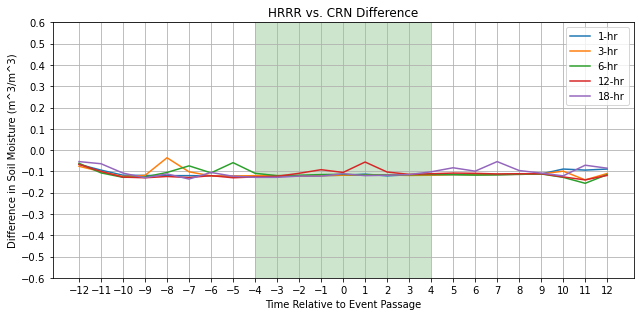

In [45]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_bat,label="1-hr")
plt.plot(hour,diff3_bat,label="3-hr")
plt.plot(hour,diff6_bat,label="6-hr")
plt.plot(hour,diff12_bat,label="12-hr")
plt.plot(hour,diff18_bat,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Lafayette, LA: 1000 UTC 5 April 2022-1000 UTC 6 April 2022</font>

In [46]:
#1 hr hrrr:
with open('hrrr_f01_Lafayette_LA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.258, 0.258, 0.258, 0.262, 0.295, 0.33, 0.362, 0.379, 0.386, 0.383, 0.37, 0.363, 0.36, 0.36, 0.35, 0.351, 0.349, 0.348, 0.347, 0.346, 0.346, 0.345, 0.345, 0.344, 0.344]


In [47]:
#Air Temp CRN:
with open('CRNH0203-2022-LA_Lafayette_13_SE.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2265:2290]
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.347, 0.347, 0.346, 0.347, 0.347, 0.349, 0.351, 0.351, 0.352, 0.352, 0.352, 0.353, 0.352, 0.352, 0.353, 0.354, 0.354, 0.355, 0.355, 0.354, 0.355, 0.355, 0.355, 0.355, 0.355]


In [48]:
difference_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_laf.append(temp_i-temp_crn_i)

print(difference_laf)

[-0.08899999999999997, -0.08899999999999997, -0.08799999999999997, -0.08499999999999996, -0.05199999999999999, -0.01899999999999996, 0.01100000000000001, 0.028000000000000025, 0.03400000000000003, 0.031000000000000028, 0.018000000000000016, 0.010000000000000009, 0.008000000000000007, 0.008000000000000007, -0.0030000000000000027, -0.0030000000000000027, -0.0050000000000000044, -0.007000000000000006, -0.008000000000000007, -0.008000000000000007, -0.009000000000000008, -0.010000000000000009, -0.010000000000000009, -0.01100000000000001, -0.01100000000000001]


In [49]:
# hour=[]
# for i in range(-15,16,1):
#     hour.append(i)
#     i+=1
# print(len(hour))

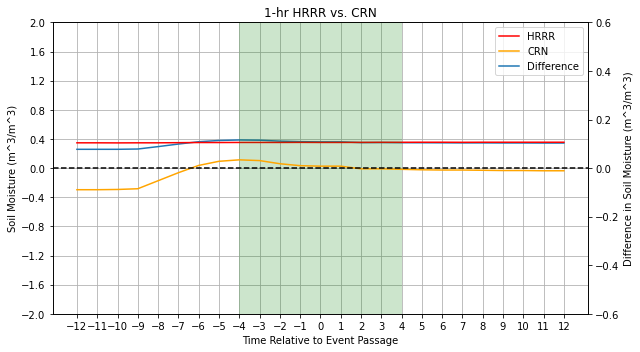

In [50]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_laf, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [51]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [52]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",lafayette1)

RSME 1-hr 48-hr HRRR vs CRN : 0.039086058895723925


In [53]:
#3 hr hrrr:
with open('hrrr_f03_Lafayette_LA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.258, 0.258, 0.258, 0.258, 0.258, 0.287, 0.371, 0.376, 0.363, 0.386, 0.445, 0.4, 0.369, 0.363, 0.356, 0.35, 0.35, 0.348, 0.347, 0.346, 0.346, 0.345, 0.345, 0.344, 0.344]


In [54]:
diff3_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_laf.append(temp_i-temp_crn_i)

print(diff3_laf)

[-0.08899999999999997, -0.08899999999999997, -0.08799999999999997, -0.08899999999999997, -0.08899999999999997, -0.062, 0.020000000000000018, 0.025000000000000022, 0.01100000000000001, 0.03400000000000003, 0.09300000000000003, 0.04700000000000004, 0.017000000000000015, 0.01100000000000001, 0.0030000000000000027, -0.0040000000000000036, -0.0040000000000000036, -0.007000000000000006, -0.008000000000000007, -0.008000000000000007, -0.009000000000000008, -0.010000000000000009, -0.010000000000000009, -0.01100000000000001, -0.01100000000000001]


In [55]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [56]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",lafayette3)

RSME 3-hr 48-hr HRRR vs CRN : 0.04799291614394774


In [57]:
#6 hr hrrr:
with open('hrrr_f06_Lafayette_LA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2260:2285]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.258, 0.258, 0.258, 0.258, 0.258, 0.258, 0.258, 0.258, 0.313, 0.363, 0.368, 0.353, 0.375, 0.418, 0.391, 0.36, 0.36, 0.352, 0.35, 0.35, 0.346, 0.346, 0.345, 0.344, 0.344]


In [58]:
diff6_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_laf.append(temp_i-temp_crn_i)

print(diff6_laf)

[-0.08899999999999997, -0.08899999999999997, -0.08799999999999997, -0.08899999999999997, -0.08899999999999997, -0.09099999999999997, -0.09299999999999997, -0.09299999999999997, -0.03899999999999998, 0.01100000000000001, 0.016000000000000014, 0.0, 0.02300000000000002, 0.066, 0.038000000000000034, 0.006000000000000005, 0.006000000000000005, -0.0030000000000000027, -0.0050000000000000044, -0.0040000000000000036, -0.009000000000000008, -0.009000000000000008, -0.010000000000000009, -0.01100000000000001, -0.01100000000000001]


In [59]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [60]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",lafayette6)

RSME 6-hr 48-hr HRRR vs CRN : 0.05435439264677693


In [61]:
#12 hr hrrr:
with open('hrrr_f12_Lafayette_LA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2254:2279]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.26, 0.26, 0.258, 0.258, 0.258, 0.258, 0.258, 0.258, 0.258, 0.258, 0.257, 0.257, 0.257, 0.257, 0.314, 0.35, 0.349, 0.339, 0.365, 0.403, 0.384, 0.356, 0.357, 0.35, 0.35]
25


In [62]:
diff12_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_laf.append(temp_i-temp_crn_i)

print(diff12_laf)

[-0.08699999999999997, -0.08699999999999997, -0.08799999999999997, -0.08899999999999997, -0.08899999999999997, -0.09099999999999997, -0.09299999999999997, -0.09299999999999997, -0.09399999999999997, -0.09399999999999997, -0.09499999999999997, -0.09599999999999997, -0.09499999999999997, -0.09499999999999997, -0.03899999999999998, -0.0040000000000000036, -0.0050000000000000044, -0.01599999999999996, 0.010000000000000009, 0.049000000000000044, 0.029000000000000026, 0.0010000000000000009, 0.0020000000000000018, -0.0050000000000000044, -0.0050000000000000044]


In [63]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [64]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",lafayette12)

RSME 12-hr 48-hr HRRR vs CRN : 0.07027972680652649


In [65]:
#18 hr hrrr:
with open('hrrr_f18_Lafayette_LA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2248:2273]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.256, 0.257, 0.257, 0.256, 0.256, 0.256, 0.26, 0.28, 0.258, 0.258, 0.257, 0.257, 0.257, 0.257, 0.257, 0.258, 0.257, 0.257, 0.257, 0.257, 0.314, 0.346, 0.347, 0.335, 0.363]


In [66]:
diff18_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_laf.append(temp_i-temp_crn_i)

print(diff18_laf)

[-0.09099999999999997, -0.08999999999999997, -0.08899999999999997, -0.09099999999999997, -0.09099999999999997, -0.09299999999999997, -0.09099999999999997, -0.07099999999999995, -0.09399999999999997, -0.09399999999999997, -0.09499999999999997, -0.09599999999999997, -0.09499999999999997, -0.09499999999999997, -0.09599999999999997, -0.09599999999999997, -0.09699999999999998, -0.09799999999999998, -0.09799999999999998, -0.09699999999999998, -0.04099999999999998, -0.009000000000000008, -0.008000000000000007, -0.019999999999999962, 0.008000000000000007]


In [67]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [68]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",lafayette18)

RSME 18-hr 48-hr HRRR vs CRN : 0.08379641997126129


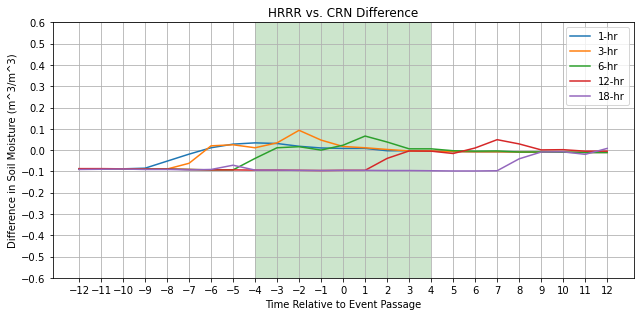

In [69]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_laf,label="1-hr")
plt.plot(hour,diff3_laf,label="3-hr")
plt.plot(hour,diff6_laf,label="6-hr")
plt.plot(hour,diff12_laf,label="12-hr")
plt.plot(hour,diff18_laf,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Monroe, LA: 1000 UTC 5 April 2022-1000 UTC 6 April 2022</font>

In [70]:
#1 hr hrrr:
with open('hrrr_f01_Monroe_LA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.342, 0.335, 0.329, 0.323, 0.318, 0.313, 0.307, 0.3, 0.29, 0.285, 0.28, 0.276, 0.273, 0.27, 0.27, 0.271, 0.271, 0.271, 0.271, 0.271, 0.271, 0.271, 0.271, 0.271, 0.27]


In [71]:
#Air Temp CRN:
with open('CRNH0203-2022-LA_Monroe_26_N.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2265:2290]
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.329, 0.333, 0.334, 0.335, 0.336, 0.336, 0.336, 0.336, 0.336, 0.334, 0.333, 0.334, 0.333, 0.335, 0.333, 0.334, 0.332, 0.334, 0.332, 0.333, 0.333, 0.335, 0.333, 0.334, 0.334]


In [72]:
difference_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_mon.append(temp_i-temp_crn_i)

print(difference_mon)

[0.013000000000000012, 0.0020000000000000018, -0.0050000000000000044, -0.01200000000000001, -0.018000000000000016, -0.02300000000000002, -0.029000000000000026, -0.03600000000000003, -0.04600000000000004, -0.049000000000000044, -0.05299999999999999, -0.057999999999999996, -0.06, -0.065, -0.063, -0.063, -0.061, -0.063, -0.061, -0.062, -0.062, -0.064, -0.062, -0.063, -0.064]


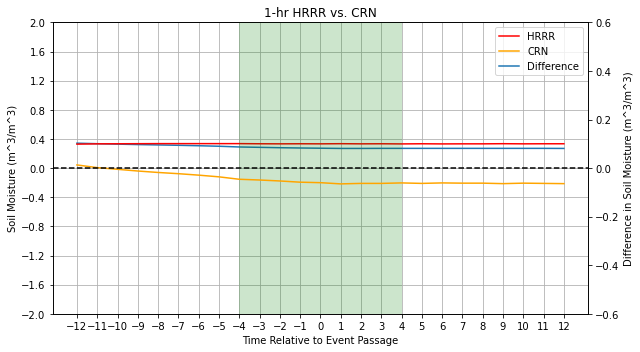

In [73]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_mon, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [74]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [75]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",monroe1)

RSME 1-hr 48-hr HRRR vs CRN : 0.05094663875075568


In [76]:
#3 hr hrrr:
with open('hrrr_f03_Monroe_LA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.39, 0.33, 0.327, 0.322, 0.317, 0.313, 0.307, 0.301, 0.296, 0.289, 0.28, 0.277, 0.274, 0.272, 0.271, 0.27, 0.27, 0.272, 0.271, 0.271, 0.271, 0.271, 0.271, 0.271, 0.271]


In [77]:
diff3_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_mon.append(temp_i-temp_crn_i)

print(diff3_mon)

[0.061, -0.0030000000000000027, -0.007000000000000006, -0.013000000000000012, -0.019000000000000017, -0.02300000000000002, -0.029000000000000026, -0.03500000000000003, -0.040000000000000036, -0.04500000000000004, -0.05299999999999999, -0.056999999999999995, -0.059, -0.063, -0.062, -0.064, -0.062, -0.062, -0.061, -0.062, -0.062, -0.064, -0.062, -0.063, -0.063]


In [78]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [79]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",monroe3)

RSME 3-hr 48-hr HRRR vs CRN : 0.051750169081849394


In [80]:
#6 hr hrrr:
with open('hrrr_f06_Monroe_LA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2260:2285]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.34, 0.323, 0.354, 0.35, 0.314, 0.31, 0.306, 0.3, 0.296, 0.291, 0.286, 0.283, 0.278, 0.273, 0.273, 0.273, 0.273, 0.273, 0.27, 0.27, 0.272, 0.272, 0.272, 0.272, 0.271]


In [81]:
diff6_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_mon.append(temp_i-temp_crn_i)

print(diff6_mon)

[0.01100000000000001, -0.010000000000000009, 0.019999999999999962, 0.014999999999999958, -0.02200000000000002, -0.026000000000000023, -0.030000000000000027, -0.03600000000000003, -0.040000000000000036, -0.04300000000000004, -0.04700000000000004, -0.051000000000000045, -0.05499999999999999, -0.062, -0.06, -0.061, -0.059, -0.061, -0.062, -0.063, -0.061, -0.063, -0.061, -0.062, -0.063]


In [82]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [83]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",monroe6)

RSME 6-hr 48-hr HRRR vs CRN : 0.049351798346159596


In [84]:
#12 hr hrrr:
with open('hrrr_f12_Monroe_LA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2254:2279]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.36, 0.35, 0.351, 0.293, 0.291, 0.308, 0.309, 0.296, 0.31, 0.318, 0.284, 0.28, 0.279, 0.276, 0.277, 0.278, 0.279, 0.28, 0.278, 0.276, 0.276, 0.275, 0.275, 0.274, 0.27]
25


In [85]:
diff12_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_mon.append(temp_i-temp_crn_i)

print(diff12_mon)

[0.030999999999999972, 0.01699999999999996, 0.01699999999999996, -0.04200000000000004, -0.04500000000000004, -0.028000000000000025, -0.027000000000000024, -0.040000000000000036, -0.026000000000000023, -0.016000000000000014, -0.049000000000000044, -0.05399999999999999, -0.05399999999999999, -0.059, -0.055999999999999994, -0.055999999999999994, -0.05299999999999999, -0.05399999999999999, -0.05399999999999999, -0.056999999999999995, -0.056999999999999995, -0.06, -0.057999999999999996, -0.06, -0.064]


In [86]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [87]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",monroe12)

RSME 12-hr 48-hr HRRR vs CRN : 0.04781547866538618


In [88]:
#18 hr hrrr:
with open('hrrr_f18_Monroe_LA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2248:2273]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.373, 0.351, 0.301, 0.302, 0.331, 0.333, 0.31, 0.31, 0.307, 0.269, 0.267, 0.275, 0.276, 0.27, 0.294, 0.308, 0.276, 0.277, 0.279, 0.278, 0.279, 0.28, 0.28, 0.28, 0.278]


In [89]:
diff18_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_mon.append(temp_i-temp_crn_i)

print(diff18_mon)

[0.043999999999999984, 0.01799999999999996, -0.03300000000000003, -0.03300000000000003, -0.0050000000000000044, -0.0030000000000000027, -0.026000000000000023, -0.026000000000000023, -0.029000000000000026, -0.065, -0.066, -0.059, -0.056999999999999995, -0.065, -0.039000000000000035, -0.026000000000000023, -0.055999999999999994, -0.056999999999999995, -0.05299999999999999, -0.05499999999999999, -0.05399999999999999, -0.05499999999999999, -0.05299999999999999, -0.05399999999999999, -0.055999999999999994]


In [90]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [91]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",monroe18)

RSME 18-hr 48-hr HRRR vs CRN : 0.047082480818240666


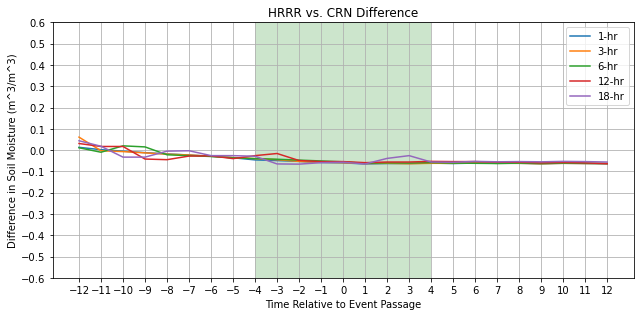

In [92]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_mon,label="1-hr")
plt.plot(hour,diff3_mon,label="3-hr")
plt.plot(hour,diff6_mon,label="6-hr")
plt.plot(hour,diff12_mon,label="12-hr")
plt.plot(hour,diff18_mon,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Holly Springs, MS: 1100 UTC 5 April 2022-1100 UTC 6 April 2022</font>

In [93]:
#1 hr hrrr:
with open('hrrr_f01_Holly Springs_MS.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2266:2291]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.218, 0.238, 0.296, 0.279, 0.27, 0.268, 0.262, 0.258, 0.255, 0.251, 0.247, 0.241, 0.23, 0.23, 0.233, 0.233, 0.234, 0.234, 0.234, 0.234, 0.234, 0.234, 0.234, 0.235, 0.236]


In [94]:
#Air Temp CRN:
with open('CRNH0203-2022-MS_Holly_Springs_4_N.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2266:2291]
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.387, 0.424, 0.443, 0.44, 0.442, 0.443, 0.442, 0.441, 0.438, 0.436, 0.434, 0.431, 0.429, 0.427, 0.426, 0.426, 0.425, 0.424, 0.424, 0.424, 0.423, 0.423, 0.423, 0.422, 0.422]


In [95]:
difference_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_hol.append(temp_i-temp_crn_i)

print(difference_hol)

[-0.169, -0.186, -0.14700000000000002, -0.16099999999999998, -0.172, -0.175, -0.18, -0.183, -0.183, -0.185, -0.187, -0.19, -0.19899999999999998, -0.19699999999999998, -0.19299999999999998, -0.19299999999999998, -0.19099999999999998, -0.18999999999999997, -0.18999999999999997, -0.18999999999999997, -0.18899999999999997, -0.18899999999999997, -0.18899999999999997, -0.187, -0.186]


In [96]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [97]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",holly1)

RSME 1-hr 48-hr HRRR vs CRN : 0.18438926216024618


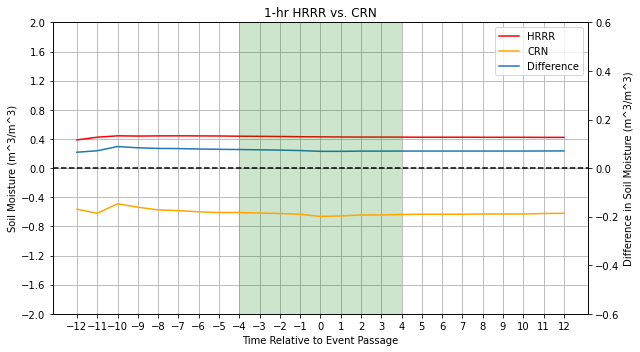

In [98]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_hol, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [99]:
#3 hr hrrr:
with open('hrrr_f03_Holly Springs_MS.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2264:2289]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.213, 0.265, 0.299, 0.289, 0.268, 0.263, 0.258, 0.258, 0.255, 0.251, 0.249, 0.246, 0.243, 0.239, 0.23, 0.23, 0.234, 0.234, 0.234, 0.234, 0.234, 0.234, 0.234, 0.235, 0.236]


In [100]:
diff3_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_hol.append(temp_i-temp_crn_i)

print(diff3_hol)

[-0.17400000000000002, -0.15899999999999997, -0.14400000000000002, -0.15100000000000002, -0.174, -0.18, -0.184, -0.183, -0.183, -0.185, -0.185, -0.185, -0.186, -0.188, -0.19599999999999998, -0.19599999999999998, -0.19099999999999998, -0.18999999999999997, -0.18999999999999997, -0.18999999999999997, -0.18899999999999997, -0.18899999999999997, -0.18899999999999997, -0.187, -0.186]


In [101]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [102]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",holly3)

RSME 3-hr 48-hr HRRR vs CRN : 0.18259901423611244


In [103]:
#6 hr hrrr:
with open('hrrr_f06_Holly Springs_MS.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2261:2286]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.215, 0.242, 0.314, 0.274, 0.281, 0.297, 0.267, 0.257, 0.253, 0.248, 0.246, 0.247, 0.244, 0.245, 0.244, 0.243, 0.24, 0.23, 0.23, 0.234, 0.234, 0.234, 0.234, 0.235, 0.235]


In [104]:
diff6_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_hol.append(temp_i-temp_crn_i)

print(diff6_hol)

[-0.17200000000000001, -0.182, -0.129, -0.16599999999999998, -0.16099999999999998, -0.14600000000000002, -0.175, -0.184, -0.185, -0.188, -0.188, -0.184, -0.185, -0.182, -0.182, -0.183, -0.185, -0.19399999999999998, -0.19399999999999998, -0.18999999999999997, -0.18899999999999997, -0.18899999999999997, -0.18899999999999997, -0.187, -0.187]


In [105]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [106]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",holly6)

RSME 6-hr 48-hr HRRR vs CRN : 0.180449660570476


In [107]:
#12 hr hrrr:
with open('hrrr_f12_Holly Springs_MS.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2255:2280]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.22, 0.268, 0.302, 0.275, 0.276, 0.265, 0.265, 0.259, 0.273, 0.265, 0.279, 0.265, 0.257, 0.246, 0.244, 0.242, 0.243, 0.246, 0.245, 0.247, 0.246, 0.245, 0.242, 0.24, 0.24]
25


In [108]:
diff12_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_hol.append(temp_i-temp_crn_i)

print(diff12_hol)

[-0.167, -0.15599999999999997, -0.14100000000000001, -0.16499999999999998, -0.16599999999999998, -0.178, -0.177, -0.182, -0.16499999999999998, -0.17099999999999999, -0.15499999999999997, -0.16599999999999998, -0.172, -0.181, -0.182, -0.184, -0.182, -0.178, -0.179, -0.177, -0.177, -0.178, -0.181, -0.182, -0.182]


In [109]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [110]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",holly12)

RSME 12-hr 48-hr HRRR vs CRN : 0.17327388724213466


In [111]:
#18 hr hrrr:
with open('hrrr_f18_Holly Springs_MS.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2249:2274]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.211, 0.232, 0.313, 0.292, 0.273, 0.28, 0.28, 0.284, 0.257, 0.257, 0.258, 0.243, 0.243, 0.243, 0.265, 0.257, 0.273, 0.263, 0.256, 0.247, 0.245, 0.243, 0.244, 0.246, 0.246]


In [112]:
diff18_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_hol.append(temp_i-temp_crn_i)

print(diff18_hol)

[-0.17600000000000002, -0.19199999999999998, -0.13, -0.14800000000000002, -0.16899999999999998, -0.16299999999999998, -0.16199999999999998, -0.15700000000000003, -0.181, -0.179, -0.176, -0.188, -0.186, -0.184, -0.16099999999999998, -0.16899999999999998, -0.15199999999999997, -0.16099999999999998, -0.16799999999999998, -0.177, -0.178, -0.18, -0.179, -0.176, -0.176]


In [113]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [114]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",holly18)

RSME 18-hr 48-hr HRRR vs CRN : 0.17127498357903875


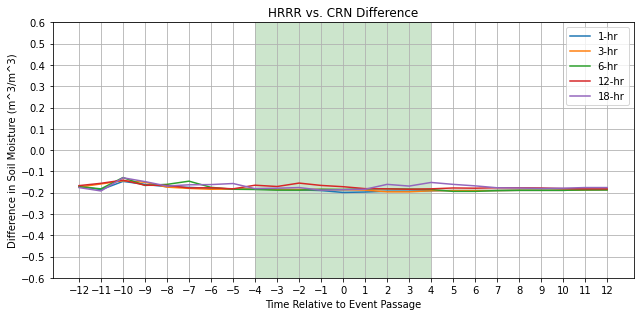

In [115]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_hol,label="1-hr")
plt.plot(hour,diff3_hol,label="3-hr")
plt.plot(hour,diff6_hol,label="6-hr")
plt.plot(hour,diff12_hol,label="12-hr")
plt.plot(hour,diff18_hol,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Newton, MS: 1100 UTC 5 April 2022-1100 UTC 6 April 2022</font>

In [116]:
#1 hr hrrr:
with open('hrrr_f01_Newton_MS.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2266:2291]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.317, 0.331, 0.432, 0.368, 0.362, 0.367, 0.36, 0.354, 0.348, 0.338, 0.326, 0.319, 0.31, 0.31, 0.309, 0.309, 0.309, 0.309, 0.309, 0.308, 0.308, 0.307, 0.307, 0.306, 0.306]


In [117]:
#Air Temp CRN:
with open('CRNH0203-2022-MS_Newton_5_ENE.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2266:2291]
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.323, 0.32, 0.356, 0.387, 0.391, 0.392, 0.393, 0.393, 0.391, 0.386, 0.376, 0.368, 0.364, 0.362, 0.36, 0.36, 0.359, 0.359, 0.358, 0.356, 0.355, 0.354, 0.353, 0.353, 0.351]


In [118]:
difference_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_new.append(temp_i-temp_crn_i)

print(difference_new)

[-0.006000000000000005, 0.01100000000000001, 0.07600000000000001, -0.019000000000000017, -0.029000000000000026, -0.025000000000000022, -0.03300000000000003, -0.039000000000000035, -0.04300000000000004, -0.04799999999999999, -0.04999999999999999, -0.04899999999999999, -0.05399999999999999, -0.05199999999999999, -0.05099999999999999, -0.05099999999999999, -0.04999999999999999, -0.04999999999999999, -0.04899999999999999, -0.04799999999999999, -0.046999999999999986, -0.046999999999999986, -0.045999999999999985, -0.046999999999999986, -0.044999999999999984]


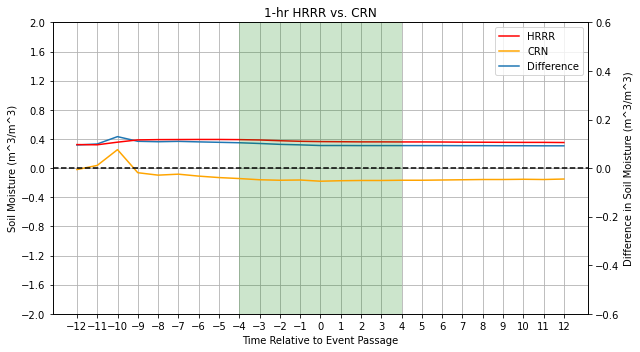

In [119]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_new, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [120]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [121]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",newtonms1)

RSME 1-hr 48-hr HRRR vs CRN : 0.04504175840262011


In [122]:
#3 hr hrrr:
with open('hrrr_f03_Newton_MS.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2264:2289]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.261, 0.262, 0.352, 0.406, 0.366, 0.355, 0.352, 0.355, 0.347, 0.343, 0.338, 0.33, 0.322, 0.317, 0.31, 0.31, 0.309, 0.309, 0.309, 0.308, 0.308, 0.307, 0.307, 0.307, 0.306]


In [123]:
diff3_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_new.append(temp_i-temp_crn_i)

print(diff3_new)

[-0.062, -0.057999999999999996, -0.0040000000000000036, 0.019000000000000017, -0.025000000000000022, -0.03700000000000003, -0.041000000000000036, -0.038000000000000034, -0.04400000000000004, -0.04299999999999998, -0.03799999999999998, -0.03799999999999998, -0.04199999999999998, -0.044999999999999984, -0.04999999999999999, -0.04999999999999999, -0.04999999999999999, -0.04999999999999999, -0.04899999999999999, -0.04799999999999999, -0.046999999999999986, -0.046999999999999986, -0.045999999999999985, -0.045999999999999985, -0.044999999999999984]


In [124]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [125]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",newtonms3)

RSME 3-hr 48-hr HRRR vs CRN : 0.04406631366474849


In [126]:
#6 hr hrrr:
with open('hrrr_f06_Newton_MS.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2261:2286]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.223, 0.234, 0.301, 0.408, 0.345, 0.329, 0.377, 0.346, 0.34, 0.336, 0.339, 0.335, 0.333, 0.332, 0.326, 0.32, 0.316, 0.31, 0.31, 0.309, 0.308, 0.308, 0.307, 0.307, 0.307]


In [127]:
diff6_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_new.append(temp_i-temp_crn_i)

print(diff6_new)

[-0.1, -0.086, -0.05499999999999999, 0.020999999999999963, -0.04600000000000004, -0.063, -0.016000000000000014, -0.04700000000000004, -0.05099999999999999, -0.04999999999999999, -0.03699999999999998, -0.032999999999999974, -0.030999999999999972, -0.02999999999999997, -0.033999999999999975, -0.03999999999999998, -0.04299999999999998, -0.04899999999999999, -0.04799999999999999, -0.046999999999999986, -0.046999999999999986, -0.045999999999999985, -0.045999999999999985, -0.045999999999999985, -0.043999999999999984]


In [128]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [129]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",newtonms6)

RSME 6-hr 48-hr HRRR vs CRN : 0.04933315315282411


In [130]:
#12 hr hrrr:
with open('hrrr_f12_Newton_MS.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2255:2280]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.22, 0.237, 0.231, 0.379, 0.353, 0.349, 0.329, 0.316, 0.299, 0.342, 0.32, 0.307, 0.341, 0.326, 0.326, 0.323, 0.329, 0.327, 0.326, 0.326, 0.322, 0.317, 0.314, 0.31, 0.31]
25


In [131]:
diff12_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_new.append(temp_i-temp_crn_i)

print(diff12_new)

[-0.10300000000000001, -0.08300000000000002, -0.12499999999999997, -0.008000000000000007, -0.038000000000000034, -0.04300000000000004, -0.064, -0.07700000000000001, -0.09200000000000003, -0.043999999999999984, -0.055999999999999994, -0.061, -0.022999999999999965, -0.035999999999999976, -0.033999999999999975, -0.03699999999999998, -0.02999999999999997, -0.03199999999999997, -0.03199999999999997, -0.02999999999999997, -0.032999999999999974, -0.03699999999999998, -0.03899999999999998, -0.04299999999999998, -0.04099999999999998]


In [132]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [133]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",newtonms12)

RSME 12-hr 48-hr HRRR vs CRN : 0.056380493080497265


In [134]:
#18 hr hrrr:
with open('hrrr_f18_Newton_MS.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2249:2274]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.223, 0.226, 0.284, 0.362, 0.402, 0.33, 0.32, 0.347, 0.309, 0.301, 0.322, 0.299, 0.28, 0.277, 0.272, 0.328, 0.315, 0.306, 0.331, 0.322, 0.321, 0.32, 0.323, 0.322, 0.321]


In [135]:
diff18_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_new.append(temp_i-temp_crn_i)

print(diff18_new)

[-0.1, -0.094, -0.07200000000000001, -0.025000000000000022, 0.01100000000000001, -0.062, -0.07300000000000001, -0.04600000000000004, -0.08200000000000002, -0.08500000000000002, -0.05399999999999999, -0.069, -0.08399999999999996, -0.08499999999999996, -0.08799999999999997, -0.03199999999999997, -0.043999999999999984, -0.05299999999999999, -0.02699999999999997, -0.033999999999999975, -0.033999999999999975, -0.033999999999999975, -0.02999999999999997, -0.030999999999999972, -0.02999999999999997]


In [136]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [137]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",newtonms18)

RSME 18-hr 48-hr HRRR vs CRN : 0.06080559184811869


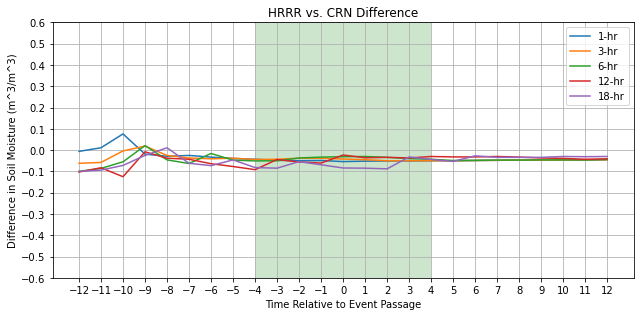

In [138]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_new,label="1-hr")
plt.plot(hour,diff3_new,label="3-hr")
plt.plot(hour,diff6_new,label="6-hr")
plt.plot(hour,diff12_new,label="12-hr")
plt.plot(hour,diff18_new,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Gainesville, AL: 1300 UTC 5 April 2022-1300 UTC 6 April 2022</font>

In [139]:
# #1 hr hrrr:
# with open('hrrr_f01_Gainesville_AL.txt') as f:
#     lst=[line.split()[4] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[2134:2159]
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [140]:
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Gainesville_2_NE.txt') as f:
#     lst=[line.split()[20] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2134:2159]
#     print(temp_crn)
#     #print(len(temp_crn))
#     # print(temp_crn[2124])

In [141]:
# difference_gai = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference_gai.append(temp_i-temp_crn_i)

# print(difference_gai)

In [142]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [143]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gainesville1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",gainesville1)

In [144]:
# plt.rcParams["figure.figsize"] = [9, 5]
# plt.rcParams["figure.autolayout"] = True

# ax1 = plt.subplot()
# plt.grid()
# ax1.grid(True, which='both')
# l1, = ax1.plot(hour,temp)
# l3, = ax1.plot(hour,temp_crn, color='red')
# ax1.set_ylim(5, 26)
# plt.yticks(np.arange(5,27,1.5))
# ax2 = ax1.twinx()
# l2, = ax2.plot(hour,difference_gai, color='orange')
# ax2.set_ylim(-10, 10)
# plt.axhline(y=0, color='black', linestyle='dashed')
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
# #ax2.yticks(np.arange(-6, 11, 2.0))
# plt.title("1-hr HRRR vs. CRN")
# plt.ylabel("Difference in Air Temperature (C)")
# ax1.set_ylabel("Air Temperature (C)")
# ax1.set_xlabel("Time Relative to Event Passage")

# plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

# plt.show()

In [145]:
# #3 hr hrrr:
# with open('hrrr_f03_Gainesville_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[2132:2157]
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [146]:
# diff3_gai = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     diff3_gai.append(temp_i-temp_crn_i)

# print(diff3_gai)

In [147]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [148]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gainesville3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",gainesville3)

In [149]:
# #6 hr hrrr:
# with open('hrrr_f06_Gainesville_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[2129:2154]
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [150]:
# diff6_gai = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     diff6_gai.append(temp_i-temp_crn_i)

# print(diff6_gai)

In [151]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [152]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gainesville6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",gainesville6)

In [153]:
# #12 hr hrrr:
# with open('hrrr_f12_Gainesville_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[2123:2148]
#     #temp=temp[2015:2063]
#     print(temp)
#     print(len(temp))
# #full time period is [2015:2112]

In [154]:
# diff12_gai = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     diff12_gai.append(temp_i-temp_crn_i)

# print(diff12_gai)

In [155]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [156]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gainesville12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",gainesville12)

In [157]:
# #18 hr hrrr:
# with open('hrrr_f18_Gainesville_AL (1).txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     #print(temp.index(6.91541))
#     temp=temp[2117:2142]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [158]:
# diff18_gai = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     diff18_gai.append(temp_i-temp_crn_i)

# print(diff18_gai)

In [159]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [160]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gainesville18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",gainesville18)

In [161]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference_gai,label="1-hr")
# plt.plot(hour,diff3_gai,label="3-hr")
# plt.plot(hour,diff6_gai,label="6-hr")
# plt.plot(hour,diff12_gai,label="12-hr")
# plt.plot(hour,diff18_gai,label="18-hr")
# plt.yticks(np.arange(-10, 11, 2.0))
# plt.ylim(-10, 10)
# plt.title("HRRR vs. CRN Difference")
# plt.xlabel("Time Relative to Event Passage")
# plt.ylabel("Difference in Air Temperature (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
# #plt.grid(axis='y')
# plt.grid()
# plt.legend()
# plt.show()

<font size="3">Fairhope, AL: 1300 UTC 5 April 2022-1300 UTC 6 April 2022</font>

In [162]:
#1 hr hrrr:
with open('hrrr_f01_Fairhope_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2268:2293]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.211, 0.211, 0.211, 0.211, 0.211, 0.411, 0.326, 0.325, 0.332, 0.324, 0.32, 0.32, 0.317, 0.318, 0.317, 0.316, 0.314, 0.312, 0.31, 0.309, 0.307, 0.306, 0.305, 0.303, 0.302]


In [163]:
#Air Temp CRN:
with open('CRNH0203-2022-AL_Fairhope_3_NE.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2268:2293]
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.174, 0.173, 0.174, 0.174, 0.173, 0.19, 0.287, 0.289, 0.283, 0.272, 0.267, 0.262, 0.26, 0.255, 0.255, 0.252, 0.251, 0.25, 0.246, 0.245, 0.244, 0.242, 0.24, 0.24, 0.239]


In [164]:
difference_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_fai.append(temp_i-temp_crn_i)

print(difference_fai)

[0.037000000000000005, 0.038000000000000006, 0.037000000000000005, 0.037000000000000005, 0.038000000000000006, 0.22099999999999997, 0.039000000000000035, 0.03600000000000003, 0.049000000000000044, 0.05199999999999999, 0.05299999999999999, 0.057999999999999996, 0.056999999999999995, 0.063, 0.062, 0.064, 0.063, 0.062, 0.064, 0.064, 0.063, 0.064, 0.065, 0.063, 0.063]


In [165]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [166]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",fairhope1)

RSME 1-hr 48-hr HRRR vs CRN : 0.06966261551219563


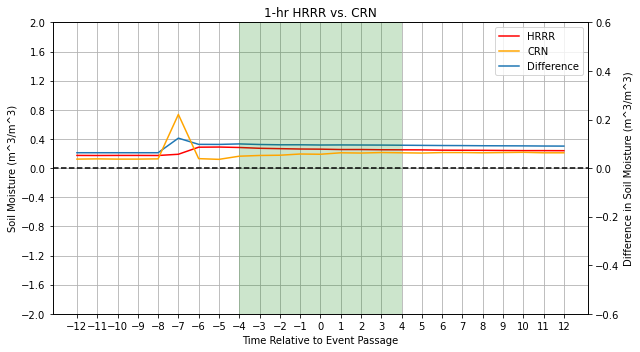

In [167]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_fai, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [168]:
#3 hr hrrr:
with open('hrrr_f03_Fairhope_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2266:2291]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.211, 0.212, 0.212, 0.211, 0.21, 0.211, 0.272, 0.37, 0.311, 0.312, 0.32, 0.321, 0.32, 0.32, 0.315, 0.317, 0.315, 0.313, 0.311, 0.309, 0.307, 0.307, 0.304, 0.303, 0.302]


In [169]:
diff3_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_fai.append(temp_i-temp_crn_i)

print(diff3_fai)

[0.037000000000000005, 0.03900000000000001, 0.038000000000000006, 0.037000000000000005, 0.037000000000000005, 0.02099999999999999, -0.014999999999999958, 0.08100000000000002, 0.028000000000000025, 0.03999999999999998, 0.05299999999999999, 0.059, 0.06, 0.065, 0.06, 0.065, 0.064, 0.063, 0.065, 0.064, 0.063, 0.065, 0.064, 0.063, 0.063]


In [170]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [171]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",fairhope3)

RSME 3-hr 48-hr HRRR vs CRN : 0.05485872765567937


In [172]:
#6 hr hrrr:
with open('hrrr_f06_Fairhope_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.211, 0.211, 0.211, 0.211, 0.214, 0.212, 0.21, 0.21, 0.328, 0.299, 0.36, 0.304, 0.307, 0.315, 0.316, 0.31, 0.31, 0.311, 0.312, 0.31, 0.308, 0.306, 0.305, 0.305, 0.303]


In [173]:
diff6_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_fai.append(temp_i-temp_crn_i)

print(diff6_fai)

[0.037000000000000005, 0.038000000000000006, 0.037000000000000005, 0.037000000000000005, 0.04100000000000001, 0.021999999999999992, -0.07699999999999999, -0.07899999999999999, 0.04500000000000004, 0.02699999999999997, 0.09299999999999997, 0.04199999999999998, 0.046999999999999986, 0.06, 0.061, 0.057999999999999996, 0.059, 0.061, 0.066, 0.065, 0.064, 0.064, 0.065, 0.065, 0.064]


In [174]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [175]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",fairhope6)

RSME 6-hr 48-hr HRRR vs CRN : 0.05743448441485307


In [176]:
#12 hr hrrr:
with open('hrrr_f12_Fairhope_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2257:2282]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.211, 0.211, 0.211, 0.211, 0.211, 0.21, 0.21, 0.327, 0.328, 0.211, 0.29, 0.358, 0.337, 0.21, 0.337, 0.274, 0.322, 0.299, 0.302, 0.306, 0.307, 0.3, 0.3, 0.303, 0.304]
25


In [177]:
diff12_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_fai.append(temp_i-temp_crn_i)

print(diff12_fai)

[0.037000000000000005, 0.038000000000000006, 0.037000000000000005, 0.037000000000000005, 0.038000000000000006, 0.01999999999999999, -0.07699999999999999, 0.038000000000000034, 0.04500000000000004, -0.061000000000000026, 0.022999999999999965, 0.09599999999999997, 0.07700000000000001, -0.04500000000000001, 0.08200000000000002, 0.02200000000000002, 0.07100000000000001, 0.04899999999999999, 0.055999999999999994, 0.061, 0.063, 0.057999999999999996, 0.06, 0.063, 0.065]


In [178]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [179]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",fairhope12)

RSME 12-hr 48-hr HRRR vs CRN : 0.056159415951378994


In [180]:
#18 hr hrrr:
with open('hrrr_f18_Fairhope_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2251:2276]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.211, 0.211, 0.211, 0.21, 0.21, 0.299, 0.375, 0.306, 0.363, 0.319, 0.29, 0.277, 0.277, 0.28, 0.313, 0.211, 0.265, 0.328, 0.318, 0.21, 0.317, 0.268, 0.313, 0.294, 0.297]


In [181]:
diff18_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_fai.append(temp_i-temp_crn_i)

print(diff18_fai)

[0.037000000000000005, 0.038000000000000006, 0.037000000000000005, 0.036000000000000004, 0.037000000000000005, 0.10899999999999999, 0.08800000000000002, 0.017000000000000015, 0.08000000000000002, 0.046999999999999986, 0.022999999999999965, 0.015000000000000013, 0.017000000000000015, 0.025000000000000022, 0.057999999999999996, -0.04100000000000001, 0.014000000000000012, 0.07800000000000001, 0.07200000000000001, -0.035, 0.07300000000000001, 0.026000000000000023, 0.07300000000000001, 0.05399999999999999, 0.057999999999999996]


In [182]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [183]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",fairhope18)

RSME 18-hr 48-hr HRRR vs CRN : 0.0538092928777177


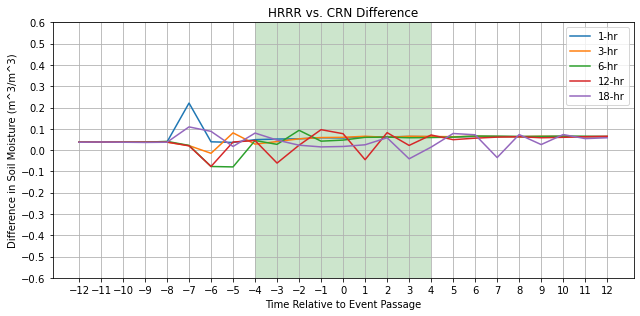

In [184]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_fai,label="1-hr")
plt.plot(hour,diff3_fai,label="3-hr")
plt.plot(hour,diff6_fai,label="6-hr")
plt.plot(hour,diff12_fai,label="12-hr")
plt.plot(hour,diff18_fai,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Selma, AL: 1300 UTC 5 April 2022-1300 UTC 6 April 2022</font>

In [185]:
#1 hr hrrr:
with open('hrrr_f01_Selma_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2268:2293]
    
#Air Temp CRN:
with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2268:2293]

    print(temp)
    print(len(temp))
    print(temp_crn)
    print(len(temp_crn))
#full time period is [2015:2112]
difference_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_sel.append(temp_i-temp_crn_i)

print(difference_sel)
print(len(difference_sel))

[0.182, 0.269, 0.265, 0.293, 0.297, 0.284, 0.276, 0.267, 0.261, 0.256, 0.25, 0.25, 0.25, 0.249, 0.248, 0.247, 0.246, 0.245, 0.245, 0.244, 0.243, 0.243, 0.242, 0.241, 0.241]
25
[0.496, 0.499, 0.501, 0.501, 0.499, 0.501, 0.503, 0.502, 0.501, 0.503, 0.504, 0.506, 0.505, 0.505, 0.506, 0.51, 0.508, 0.509, 0.505, 0.507, 0.506, 0.506, 0.507, 0.506, 0.51]
25
[-0.314, -0.22999999999999998, -0.236, -0.20800000000000002, -0.202, -0.21700000000000003, -0.22699999999999998, -0.235, -0.24, -0.247, -0.254, -0.256, -0.255, -0.256, -0.258, -0.263, -0.262, -0.264, -0.26, -0.263, -0.263, -0.263, -0.265, -0.265, -0.269]
25


In [186]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# difference_sel[17]=None
# difference_sel[18]=None
# difference_sel[19]=None
# difference_sel[20]=None
# print(temp)
# print(temp_crn)
# print(difference_sel)


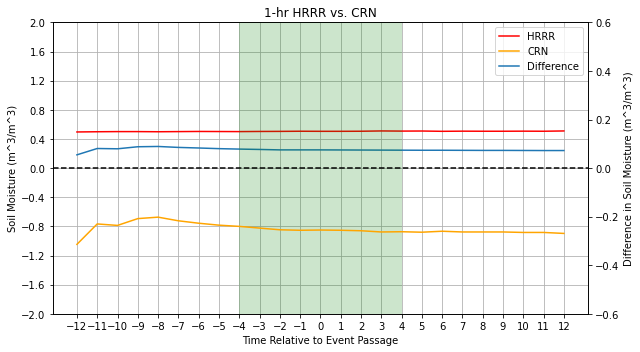

In [187]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_sel, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [188]:
#3 hr hrrr:
with open('hrrr_f03_Selma_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2266:2291]

# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]

    print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff3_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_sel.append(temp_i-temp_crn_i)

print(diff3_sel)
print(len(diff3_sel))

[0.261, 0.25, 0.345, 0.323, 0.323, 0.283, 0.277, 0.266, 0.26, 0.256, 0.253, 0.252, 0.25, 0.25, 0.248, 0.247, 0.246, 0.245, 0.245, 0.244, 0.243, 0.243, 0.242, 0.242, 0.241]
[-0.235, -0.249, -0.15600000000000003, -0.178, -0.176, -0.21800000000000003, -0.22599999999999998, -0.236, -0.241, -0.247, -0.251, -0.254, -0.255, -0.255, -0.258, -0.263, -0.262, -0.264, -0.26, -0.263, -0.263, -0.263, -0.265, -0.264, -0.269]
25


In [189]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff3_sel[17]=None
# diff3_sel[18]=None
# diff3_sel[19]=None
# diff3_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff3_sel)

In [190]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [191]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",selma3)

In [192]:
#6 hr hrrr:
with open('hrrr_f06_Selma_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]
print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff6_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_sel.append(temp_i-temp_crn_i)

print(diff6_sel)
print(len(diff6_sel))

[0.174, 0.245, 0.372, 0.346, 0.354, 0.312, 0.285, 0.286, 0.258, 0.256, 0.251, 0.251, 0.25, 0.249, 0.248, 0.25, 0.25, 0.246, 0.245, 0.244, 0.244, 0.244, 0.244, 0.242, 0.242]
[-0.322, -0.254, -0.129, -0.15500000000000003, -0.14500000000000002, -0.189, -0.21800000000000003, -0.21600000000000003, -0.243, -0.247, -0.253, -0.255, -0.255, -0.256, -0.258, -0.26, -0.258, -0.263, -0.26, -0.263, -0.262, -0.262, -0.263, -0.264, -0.268]
25


In [193]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff6_sel[17]=None
# diff6_sel[18]=None
# diff6_sel[19]=None
# diff6_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff6_sel)

In [194]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [195]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",selma6)

In [196]:
#12 hr hrrr:
with open('hrrr_f12_Selma_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2257:2282]
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]

print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff12_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_sel.append(temp_i-temp_crn_i)

print(diff12_sel)
print(len(diff12_sel))

[0.174, 0.175, 0.175, 0.369, 0.346, 0.324, 0.303, 0.298, 0.313, 0.296, 0.304, 0.278, 0.257, 0.267, 0.247, 0.248, 0.245, 0.245, 0.244, 0.244, 0.243, 0.24, 0.24, 0.243, 0.242]
[-0.322, -0.324, -0.326, -0.132, -0.15300000000000002, -0.177, -0.2, -0.20400000000000001, -0.188, -0.20700000000000002, -0.2, -0.22799999999999998, -0.248, -0.238, -0.259, -0.262, -0.263, -0.264, -0.261, -0.263, -0.263, -0.266, -0.267, -0.263, -0.268]
25


In [197]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff12_sel[17]=None
# diff12_sel[18]=None
# diff12_sel[19]=None
# diff12_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff12_sel)

In [198]:
# difference12 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference12.append(temp_i-temp_crn_i)

# print(difference12)

In [199]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [200]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",selma12)

In [201]:
#18 hr hrrr:
with open('hrrr_f18_Selma_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2251:2276]
    
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]

print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff18_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_sel.append(temp_i-temp_crn_i)

print(diff18_sel)
print(len(diff18_sel))

[0.174, 0.175, 0.21, 0.35, 0.34, 0.299, 0.285, 0.274, 0.271, 0.3, 0.291, 0.283, 0.271, 0.274, 0.295, 0.285, 0.29, 0.268, 0.251, 0.26, 0.244, 0.244, 0.242, 0.242, 0.242]
[-0.322, -0.324, -0.29100000000000004, -0.15100000000000002, -0.15899999999999997, -0.202, -0.21800000000000003, -0.22799999999999998, -0.22999999999999998, -0.203, -0.21300000000000002, -0.22300000000000003, -0.23399999999999999, -0.23099999999999998, -0.21100000000000002, -0.22500000000000003, -0.21800000000000003, -0.241, -0.254, -0.247, -0.262, -0.262, -0.265, -0.264, -0.268]
25


In [202]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff18_sel[17]=None
# diff18_sel[18]=None
# diff18_sel[19]=None
# diff18_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff18_sel)

In [203]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [204]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",selma18)

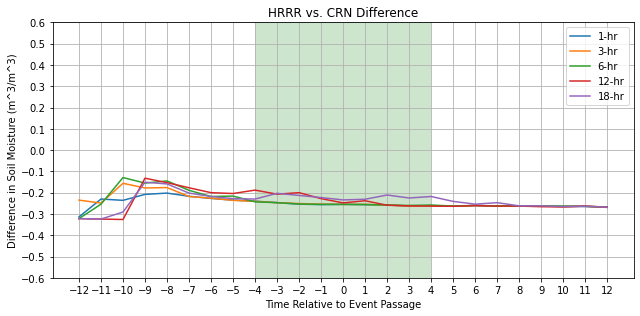

In [205]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sel,label="1-hr")
plt.plot(hour,diff3_sel,label="3-hr")
plt.plot(hour,diff6_sel,label="6-hr")
plt.plot(hour,diff12_sel,label="12-hr")
plt.plot(hour,diff18_sel,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Bowling Green, KY: 1500 UTC 5 April 2022-1500 UTC 6 April 2022</font>

In [206]:
#1 hr hrrr:
with open('hrrr_f01_Bowling Green_KY.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2270:2295]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.195, 0.195, 0.196, 0.199, 0.211, 0.255, 0.265, 0.264, 0.26, 0.25, 0.248, 0.245, 0.243, 0.241, 0.24, 0.238, 0.237, 0.237, 0.236, 0.235, 0.235, 0.235, 0.247, 0.267, 0.28]


In [207]:
# hour=[]
# for i in range(-8,17,1):
#     hour.append(i)
#     i+=1
# print(len(hour))

In [208]:
#Air Temp CRN:
with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2270:2295]
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.363, 0.365, 0.372, 0.38, 0.392, 0.413, 0.418, 0.415, 0.411, 0.407, 0.404, 0.401, 0.4, 0.399, 0.397, 0.396, 0.395, 0.394, 0.392, 0.391, 0.391, 0.39, 0.41, 0.44, 0.434]


In [209]:
difference_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_bow.append(temp_i-temp_crn_i)

print(difference_bow)

[-0.16799999999999998, -0.16999999999999998, -0.176, -0.181, -0.18100000000000002, -0.15799999999999997, -0.15299999999999997, -0.15099999999999997, -0.15099999999999997, -0.15699999999999997, -0.15600000000000003, -0.15600000000000003, -0.15700000000000003, -0.15800000000000003, -0.15700000000000003, -0.15800000000000003, -0.15800000000000003, -0.15700000000000003, -0.15600000000000003, -0.15600000000000003, -0.15600000000000003, -0.15500000000000003, -0.16299999999999998, -0.173, -0.15399999999999997]


In [210]:
# temp[6]=None
# temp_crn[6]=None
# difference_bow[6]=None

# print(temp)
# print(temp_crn)
# print(difference_bow)

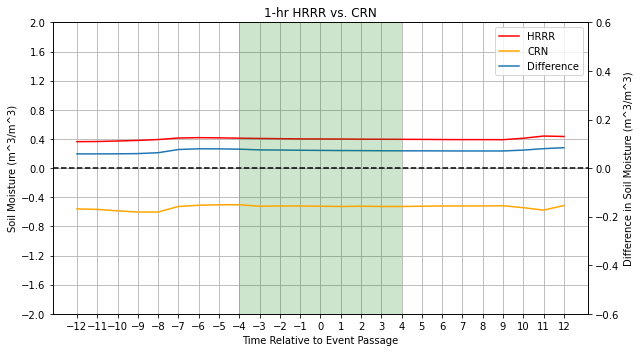

In [211]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_bow, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [212]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [213]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",bowling1)

In [214]:
#3 hr hrrr:
with open('hrrr_f03_Bowling Green_KY.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2268:2293]
    #temp=temp[2015:2063]
    print(temp)
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
#     #print(len(temp))
# #full time period is [2015:2112]

[0.195, 0.195, 0.195, 0.196, 0.217, 0.242, 0.257, 0.258, 0.253, 0.252, 0.25, 0.25, 0.243, 0.241, 0.24, 0.238, 0.237, 0.237, 0.236, 0.235, 0.235, 0.234, 0.241, 0.254, 0.281]


In [215]:
diff3_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_bow.append(temp_i-temp_crn_i)

print(diff3_bow)

[-0.16799999999999998, -0.16999999999999998, -0.177, -0.184, -0.17500000000000002, -0.17099999999999999, -0.16099999999999998, -0.15699999999999997, -0.15799999999999997, -0.15499999999999997, -0.15400000000000003, -0.15100000000000002, -0.15700000000000003, -0.15800000000000003, -0.15700000000000003, -0.15800000000000003, -0.15800000000000003, -0.15700000000000003, -0.15600000000000003, -0.15600000000000003, -0.15600000000000003, -0.156, -0.16899999999999998, -0.186, -0.15299999999999997]


In [216]:
# temp[6]=None
# temp_crn[6]=None
# diff3_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff3_bow)

In [217]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [218]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",bowling3)

In [219]:
#6 hr hrrr:
with open('hrrr_f06_Bowling Green_KY.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    #temp=temp[2015:2063]
    print(temp)
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
#     #print(len(temp))
# #full time period is [2015:2112]

[0.195, 0.195, 0.195, 0.195, 0.251, 0.294, 0.261, 0.282, 0.264, 0.247, 0.246, 0.242, 0.244, 0.24, 0.24, 0.238, 0.238, 0.237, 0.236, 0.236, 0.236, 0.235, 0.236, 0.255, 0.338]


In [220]:
diff6_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_bow.append(temp_i-temp_crn_i)

print(diff6_bow)

[-0.16799999999999998, -0.16999999999999998, -0.177, -0.185, -0.14100000000000001, -0.119, -0.15699999999999997, -0.133, -0.14699999999999996, -0.15999999999999998, -0.15800000000000003, -0.15900000000000003, -0.15600000000000003, -0.15900000000000003, -0.15700000000000003, -0.15800000000000003, -0.15700000000000003, -0.15700000000000003, -0.15600000000000003, -0.15500000000000003, -0.15500000000000003, -0.15500000000000003, -0.174, -0.185, -0.09599999999999997]


In [221]:
# temp[6]=None
# temp_crn[6]=None
# diff6_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff6_bow)

In [222]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [223]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",bowling6)

In [224]:
#12 hr hrrr:
with open('hrrr_f12_Bowling Green_KY.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2259:2284]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
# #full time period is [2015:2112]

[0.194, 0.194, 0.194, 0.194, 0.207, 0.211, 0.272, 0.274, 0.27, 0.258, 0.264, 0.255, 0.246, 0.255, 0.243, 0.235, 0.236, 0.234, 0.237, 0.24, 0.24, 0.235, 0.243, 0.353, 0.315]
25


In [225]:
diff12_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_bow.append(temp_i-temp_crn_i)

print(diff12_bow)

[-0.16899999999999998, -0.17099999999999999, -0.178, -0.186, -0.18500000000000003, -0.20199999999999999, -0.14599999999999996, -0.14099999999999996, -0.14099999999999996, -0.14899999999999997, -0.14, -0.14600000000000002, -0.15400000000000003, -0.14400000000000002, -0.15400000000000003, -0.16100000000000003, -0.15900000000000003, -0.16, -0.15500000000000003, -0.15100000000000002, -0.15100000000000002, -0.15500000000000003, -0.16699999999999998, -0.08700000000000002, -0.119]


In [226]:
# temp[6]=None
# temp_crn[6]=None
# diff12_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff12_bow)

In [227]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [228]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",bowling12)

In [229]:
#18 hr hrrr:
with open('hrrr_f18_Bowling Green_KY.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2253:2278]
    print(temp)
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
#     #print(len(temp))
# #full time period is [2015:2112]

[0.197, 0.2, 0.19, 0.198, 0.196, 0.257, 0.245, 0.229, 0.225, 0.22, 0.227, 0.217, 0.243, 0.248, 0.253, 0.242, 0.258, 0.249, 0.239, 0.253, 0.239, 0.232, 0.234, 0.286, 0.315]


In [230]:
diff18_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_bow.append(temp_i-temp_crn_i)

print(diff18_bow)

[-0.16599999999999998, -0.16499999999999998, -0.182, -0.182, -0.196, -0.15599999999999997, -0.173, -0.18599999999999997, -0.18599999999999997, -0.18699999999999997, -0.17700000000000002, -0.18400000000000002, -0.15700000000000003, -0.15100000000000002, -0.14400000000000002, -0.15400000000000003, -0.137, -0.14500000000000002, -0.15300000000000002, -0.138, -0.15200000000000002, -0.158, -0.17599999999999996, -0.15400000000000003, -0.119]


In [231]:
# temp[6]=None
# temp_crn[6]=None
# diff18_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff18_bow)

In [232]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [233]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",bowling18)

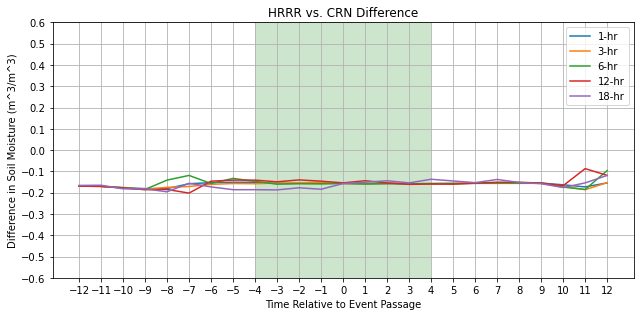

In [234]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_bow,label="1-hr")
plt.plot(hour,diff3_bow,label="3-hr")
plt.plot(hour,diff6_bow,label="6-hr")
plt.plot(hour,diff12_bow,label="12-hr")
plt.plot(hour,diff18_bow,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Gadsden, AL: 1500 UTC 5 April 2022-1500 UTC 6 April 2022</font>

In [235]:
#1 hr hrrr:
with open('hrrr_f01_Gadsden_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2270:2295]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.217, 0.306, 0.316, 0.303, 0.295, 0.289, 0.288, 0.282, 0.27, 0.27, 0.269, 0.267, 0.266, 0.265, 0.265, 0.264, 0.264, 0.263, 0.263, 0.263, 0.262, 0.263, 0.263, 0.262, 0.262]


In [236]:
#Air Temp CRN:
with open('CRNH0203-2022-AL_Gadsden_19_N.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2270:2295]
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.31, 0.328, 0.327, 0.32, 0.317, 0.313, 0.308, 0.307, 0.305, 0.304, 0.303, 0.302, 0.301, 0.3, 0.299, 0.299, 0.298, 0.298, 0.297, 0.297, 0.297, 0.297, 0.296, 0.296, 0.296]


In [237]:
difference_gad = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_gad.append(temp_i-temp_crn_i)

print(difference_gad)

[-0.093, -0.02200000000000002, -0.01100000000000001, -0.017000000000000015, -0.02200000000000002, -0.02400000000000002, -0.020000000000000018, -0.025000000000000022, -0.034999999999999976, -0.033999999999999975, -0.033999999999999975, -0.034999999999999976, -0.034999999999999976, -0.034999999999999976, -0.033999999999999975, -0.034999999999999976, -0.033999999999999975, -0.034999999999999976, -0.033999999999999975, -0.033999999999999975, -0.034999999999999976, -0.033999999999999975, -0.032999999999999974, -0.033999999999999975, -0.033999999999999975]


In [238]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [239]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gadsden1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",gadsden1)

RSME 1-hr 48-hr HRRR vs CRN : 0.03560674093482861


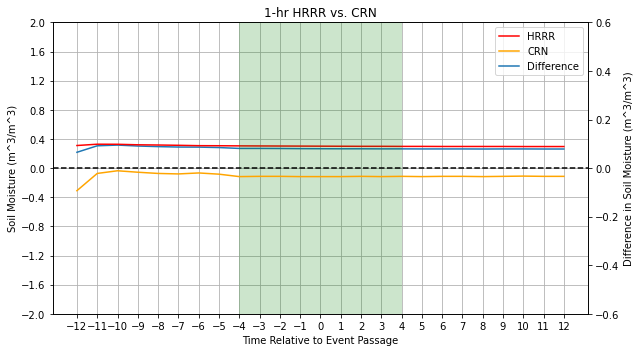

In [240]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_gad, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [241]:
#3 hr hrrr:
with open('hrrr_f03_Gadsden_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2268:2293]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.235, 0.373, 0.319, 0.304, 0.287, 0.281, 0.28, 0.29, 0.281, 0.294, 0.27, 0.27, 0.266, 0.265, 0.265, 0.264, 0.264, 0.263, 0.263, 0.263, 0.263, 0.262, 0.262, 0.263, 0.262]


In [242]:
diff3_gad = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_gad.append(temp_i-temp_crn_i)

print(diff3_gad)

[-0.07500000000000001, 0.044999999999999984, -0.008000000000000007, -0.016000000000000014, -0.030000000000000027, -0.03199999999999997, -0.02799999999999997, -0.017000000000000015, -0.023999999999999966, -0.010000000000000009, -0.032999999999999974, -0.03199999999999997, -0.034999999999999976, -0.034999999999999976, -0.033999999999999975, -0.034999999999999976, -0.033999999999999975, -0.034999999999999976, -0.033999999999999975, -0.033999999999999975, -0.033999999999999975, -0.034999999999999976, -0.033999999999999975, -0.032999999999999974, -0.033999999999999975]


In [243]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [244]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gadsden3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",gadsden3)

RSME 3-hr 48-hr HRRR vs CRN : 0.03409516094697309


In [245]:
#6 hr hrrr:
with open('hrrr_f06_Gadsden_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.361, 0.34, 0.346, 0.299, 0.296, 0.31, 0.285, 0.276, 0.269, 0.276, 0.28, 0.275, 0.281, 0.27, 0.27, 0.264, 0.264, 0.264, 0.263, 0.263, 0.263, 0.262, 0.263, 0.263, 0.262]


In [246]:
diff6_gad = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_gad.append(temp_i-temp_crn_i)

print(diff6_gad)

[0.05099999999999999, 0.01200000000000001, 0.01899999999999996, -0.02100000000000002, -0.02100000000000002, -0.0030000000000000027, -0.02300000000000002, -0.030999999999999972, -0.035999999999999976, -0.02799999999999997, -0.022999999999999965, -0.02699999999999997, -0.019999999999999962, -0.02999999999999997, -0.02899999999999997, -0.034999999999999976, -0.033999999999999975, -0.033999999999999975, -0.033999999999999975, -0.033999999999999975, -0.033999999999999975, -0.034999999999999976, -0.032999999999999974, -0.032999999999999974, -0.033999999999999975]


In [247]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [248]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gadsden6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",gadsden6)

RSME 6-hr 48-hr HRRR vs CRN : 0.030019993337774057


In [249]:
#12 hr hrrr:
with open('hrrr_f12_Gadsden_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2259:2284]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.346, 0.338, 0.374, 0.365, 0.347, 0.294, 0.305, 0.285, 0.32, 0.269, 0.284, 0.293, 0.273, 0.262, 0.263, 0.268, 0.273, 0.27, 0.275, 0.26, 0.26, 0.263, 0.263, 0.263, 0.262]
25


In [250]:
diff12_gad = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_gad.append(temp_i-temp_crn_i)

print(diff12_gad)

[0.035999999999999976, 0.010000000000000009, 0.046999999999999986, 0.044999999999999984, 0.02999999999999997, -0.019000000000000017, -0.0030000000000000027, -0.02200000000000002, 0.015000000000000013, -0.034999999999999976, -0.019000000000000017, -0.009000000000000008, -0.02799999999999997, -0.03799999999999998, -0.035999999999999976, -0.030999999999999972, -0.024999999999999967, -0.02799999999999997, -0.021999999999999964, -0.03699999999999998, -0.03699999999999998, -0.033999999999999975, -0.032999999999999974, -0.032999999999999974, -0.033999999999999975]


In [251]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [252]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gadsden12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",gadsden12)

RSME 12-hr 48-hr HRRR vs CRN : 0.03025359482772252


In [253]:
#18 hr hrrr:
with open('hrrr_f18_Gadsden_AL.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2253:2278]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.225, 0.38, 0.36, 0.351, 0.337, 0.333, 0.334, 0.332, 0.328, 0.324, 0.321, 0.289, 0.295, 0.285, 0.305, 0.265, 0.281, 0.288, 0.271, 0.26, 0.26, 0.265, 0.271, 0.268, 0.286]


In [254]:
diff18_gad = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_gad.append(temp_i-temp_crn_i)

print(diff18_gad)

[-0.08499999999999999, 0.05199999999999999, 0.032999999999999974, 0.030999999999999972, 0.020000000000000018, 0.020000000000000018, 0.026000000000000023, 0.025000000000000022, 0.02300000000000002, 0.020000000000000018, 0.018000000000000016, -0.013000000000000012, -0.006000000000000005, -0.015000000000000013, 0.006000000000000005, -0.033999999999999975, -0.01699999999999996, -0.010000000000000009, -0.025999999999999968, -0.03699999999999998, -0.03699999999999998, -0.03199999999999997, -0.024999999999999967, -0.02799999999999997, -0.010000000000000009]


In [255]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [256]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gadsden18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",gadsden18)

RSME 18-hr 48-hr HRRR vs CRN : 0.030522778379433277


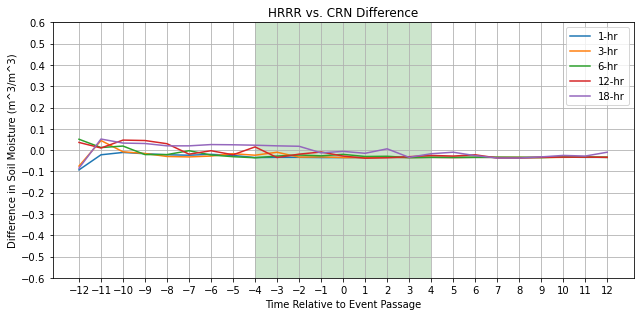

In [257]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_gad,label="1-hr")
plt.plot(hour,diff3_gad,label="3-hr")
plt.plot(hour,diff6_gad,label="6-hr")
plt.plot(hour,diff12_gad,label="12-hr")
plt.plot(hour,diff18_gad,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Newton, GA: 1800 UTC 5 April 2022-1800 UTC 6 April 2022</font>

In [258]:
#1 hr hrrr:
with open('hrrr_f01_Newton_GA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2273:2298]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.199, 0.199, 0.199, 0.23, 0.317, 0.31, 0.36, 0.317, 0.304, 0.3, 0.297, 0.296, 0.295, 0.294, 0.293, 0.293, 0.292, 0.291, 0.291, 0.29, 0.288, 0.287, 0.284, 0.282, 0.28]


In [259]:
#Air Temp CRN:
with open('CRNH0203-2022-GA_Newton_11_SW.txt') as f:
    lst=[line.split()[28] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2273:2298]
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.168, 0.167, 0.166, 0.256, 0.282, 0.279, 0.266, 0.262, 0.254, 0.25, 0.247, 0.242, 0.239, 0.237, 0.235, 0.233, 0.231, 0.23, 0.228, 0.227, 0.226, 0.225, 0.223, 0.222, 0.22]


In [260]:
difference_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_newt.append(temp_i-temp_crn_i)

print(difference_newt)

[0.031, 0.032, 0.033, -0.025999999999999995, 0.03500000000000003, 0.030999999999999972, 0.09399999999999997, 0.05499999999999999, 0.04999999999999999, 0.04999999999999999, 0.04999999999999999, 0.05399999999999999, 0.055999999999999994, 0.056999999999999995, 0.057999999999999996, 0.05999999999999997, 0.06099999999999997, 0.06099999999999997, 0.06299999999999997, 0.06299999999999997, 0.06199999999999997, 0.06199999999999997, 0.06099999999999997, 0.05999999999999997, 0.060000000000000026]


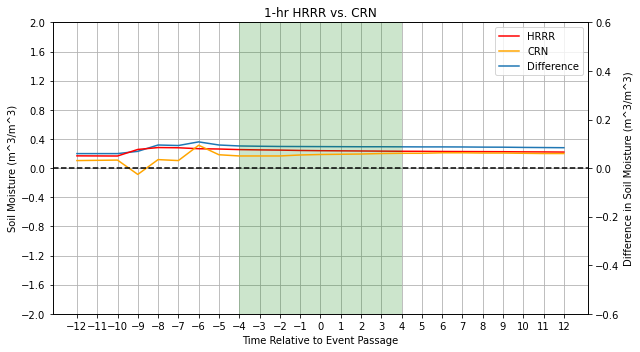

In [261]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(-2, 2)
plt.yticks(np.arange(-2,2.4,0.4))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_newt, color='orange')
ax2.set_ylim(-0.6, 0.6,)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
plt.title("1-hr HRRR vs. CRN")
ax1.set_xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
ax1.set_ylabel("Soil Moisture (m^3/m^3)")

plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

plt.show()

In [262]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [263]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",newtonga1)

RSME 1-hr 48-hr HRRR vs CRN : 0.05497308432314853


In [264]:
#3 hr hrrr:
with open('hrrr_f03_Newton_GA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2271:2296]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.205, 0.205, 0.199, 0.199, 0.387, 0.332, 0.308, 0.33, 0.31, 0.3, 0.297, 0.296, 0.295, 0.295, 0.295, 0.293, 0.292, 0.291, 0.291, 0.29, 0.288, 0.285, 0.283, 0.28, 0.276]


In [265]:
diff3_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_newt.append(temp_i-temp_crn_i)

print(diff3_newt)

[0.03699999999999998, 0.03799999999999998, 0.033, -0.056999999999999995, 0.10500000000000004, 0.05299999999999999, 0.04199999999999998, 0.068, 0.055999999999999994, 0.04999999999999999, 0.04999999999999999, 0.05399999999999999, 0.055999999999999994, 0.057999999999999996, 0.06, 0.05999999999999997, 0.06099999999999997, 0.06099999999999997, 0.06299999999999997, 0.06299999999999997, 0.06199999999999997, 0.05999999999999997, 0.05999999999999997, 0.058000000000000024, 0.05600000000000002]


In [266]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [267]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",newtonga3)

RSME 3-hr 48-hr HRRR vs CRN : 0.058326323388329555


In [268]:
#6 hr hrrr:
with open('hrrr_f06_Newton_GA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2268:2293]
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.194, 0.198, 0.204, 0.205, 0.35, 0.325, 0.359, 0.321, 0.322, 0.283, 0.29, 0.3, 0.295, 0.305, 0.294, 0.293, 0.292, 0.292, 0.291, 0.29, 0.288, 0.286, 0.282, 0.279, 0.275]


In [269]:
diff6_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_newt.append(temp_i-temp_crn_i)

print(diff6_newt)

[0.025999999999999995, 0.031, 0.03799999999999998, -0.05100000000000002, 0.068, 0.045999999999999985, 0.09299999999999997, 0.059, 0.068, 0.032999999999999974, 0.04299999999999998, 0.057999999999999996, 0.055999999999999994, 0.068, 0.059, 0.05999999999999997, 0.06099999999999997, 0.06199999999999997, 0.06299999999999997, 0.06299999999999997, 0.06199999999999997, 0.06099999999999997, 0.05899999999999997, 0.05700000000000002, 0.05500000000000002]


In [270]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [271]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",newtonga6)

RSME 6-hr 48-hr HRRR vs CRN : 0.05766870901971015


In [272]:
#12 hr hrrr:
with open('hrrr_f12_Newton_GA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2262:2287]
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.194, 0.194, 0.194, 0.194, 0.205, 0.342, 0.316, 0.356, 0.363, 0.32, 0.321, 0.28, 0.327, 0.315, 0.31, 0.269, 0.28, 0.3, 0.293, 0.296, 0.289, 0.287, 0.284, 0.283, 0.28]
25


In [273]:
diff12_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_newt.append(temp_i-temp_crn_i)

print(diff12_newt)

[0.025999999999999995, 0.026999999999999996, 0.027999999999999997, -0.062, -0.07699999999999999, 0.063, 0.04999999999999999, 0.09399999999999997, 0.10899999999999999, 0.07, 0.07400000000000001, 0.038000000000000034, 0.08800000000000002, 0.07800000000000001, 0.07500000000000001, 0.036000000000000004, 0.049000000000000016, 0.06999999999999998, 0.06499999999999997, 0.06899999999999998, 0.06299999999999997, 0.06199999999999997, 0.06099999999999997, 0.06099999999999997, 0.060000000000000026]


In [274]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [275]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",newtonga12)

RSME 12-hr 48-hr HRRR vs CRN : 0.06537858976759899


In [276]:
#18 hr hrrr:
with open('hrrr_f18_Newton_GA.txt') as f:
    lst=[line.split()[8] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2256:2281]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.194, 0.194, 0.194, 0.194, 0.195, 0.316, 0.301, 0.308, 0.312, 0.362, 0.315, 0.338, 0.332, 0.328, 0.328, 0.309, 0.309, 0.276, 0.312, 0.305, 0.301, 0.265, 0.28, 0.29, 0.29]


In [277]:
diff18_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_newt.append(temp_i-temp_crn_i)

print(diff18_newt)

[0.025999999999999995, 0.026999999999999996, 0.027999999999999997, -0.062, -0.08699999999999997, 0.03699999999999998, 0.034999999999999976, 0.045999999999999985, 0.057999999999999996, 0.11199999999999999, 0.068, 0.09600000000000003, 0.09300000000000003, 0.09100000000000003, 0.09300000000000003, 0.07599999999999998, 0.07799999999999999, 0.04600000000000001, 0.08399999999999999, 0.07799999999999999, 0.07499999999999998, 0.04000000000000001, 0.05700000000000002, 0.06799999999999998, 0.06999999999999998]


In [278]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [279]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",newtonga18)

RSME 18-hr 48-hr HRRR vs CRN : 0.06949906474190858


In [280]:
# hour=[]
# for i in range(-12,13,1):
#     hour.append(i)
#     i+=1
# print(len(hour))

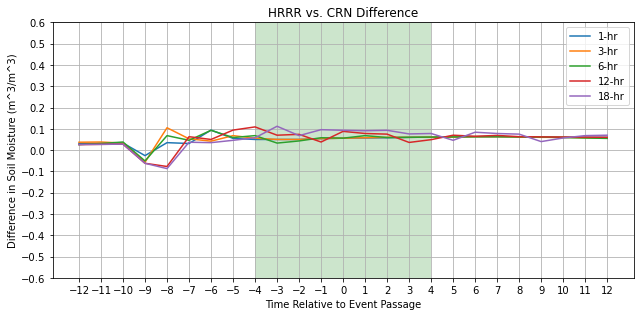

In [281]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_newt,label="1-hr")
plt.plot(hour,diff3_newt,label="3-hr")
plt.plot(hour,diff6_newt,label="6-hr")
plt.plot(hour,diff12_newt,label="12-hr")
plt.plot(hour,diff18_newt,label="18-hr")
plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

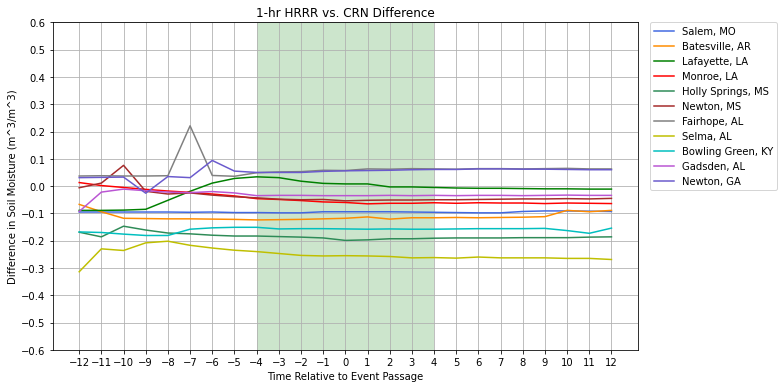

In [282]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,difference_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,difference_laf,c='g',label="Lafayette, LA")
plt.plot(hour,difference_mon,c='r',label="Monroe, LA")
plt.plot(hour,difference_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,difference_new,c='brown',label="Newton, MS")
#plt.plot(hour,difference_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,difference_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,difference_sel,c='y',label="Selma, AL")
plt.plot(hour,difference_bow,c='c',label="Bowling Green, KY")
plt.plot(hour,difference_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,difference_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("1-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

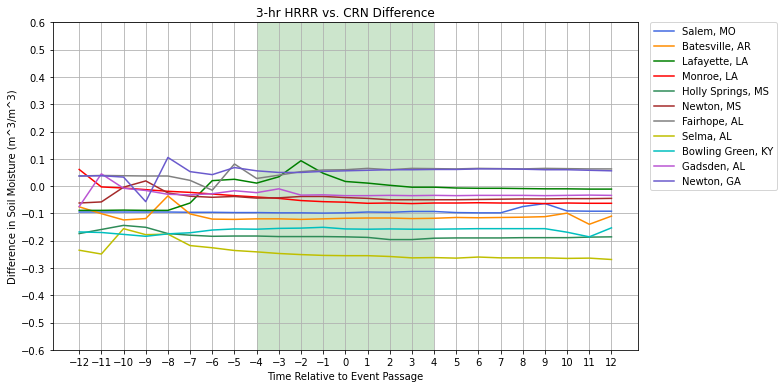

In [283]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff3_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff3_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff3_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff3_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff3_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff3_new,c='brown',label="Newton, MS")
#plt.plot(hour,diff3_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff3_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff3_sel,c='y',label="Selma, AL")
plt.plot(hour,diff3_bow,c='c',label="Bowling Green, KY")
plt.plot(hour,diff3_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff3_newt,c='slateblue',label="Newton, GA")


plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("3-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

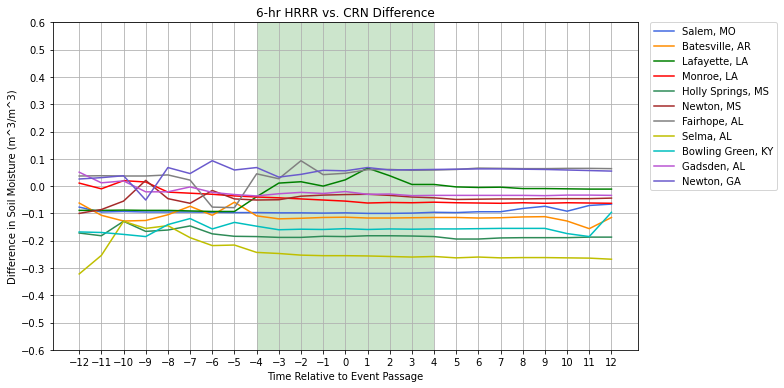

In [284]:
#plot 6-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff6_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff6_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff6_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff6_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff6_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff6_new,c='brown',label="Newton, MS")
#plt.plot(hour,diff6_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff6_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff6_sel,c='y',label="Selma, AL")
plt.plot(hour,diff6_bow,c='c',label="Bowling Green, KY")
plt.plot(hour,diff6_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff6_newt,c='slateblue',label="Newton, GA")


plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("6-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

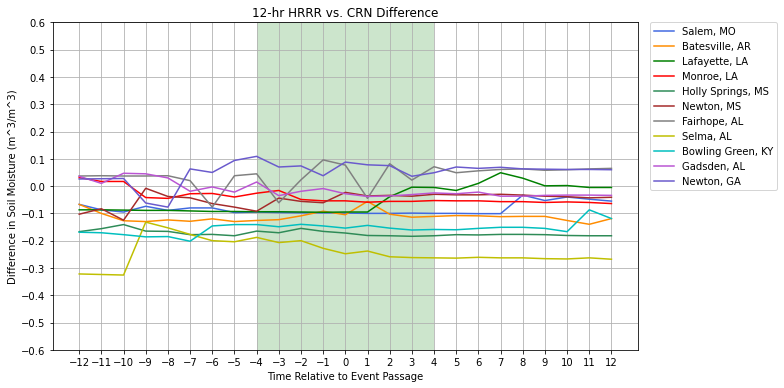

In [285]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff12_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff12_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff12_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff12_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff12_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff12_new,c='brown',label="Newton, MS")
#plt.plot(hour,diff12_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff12_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff12_sel,c='y',label="Selma, AL")
plt.plot(hour,diff12_bow,c='c',label="Bowling Green, KY")
plt.plot(hour,diff12_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff12_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("12-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

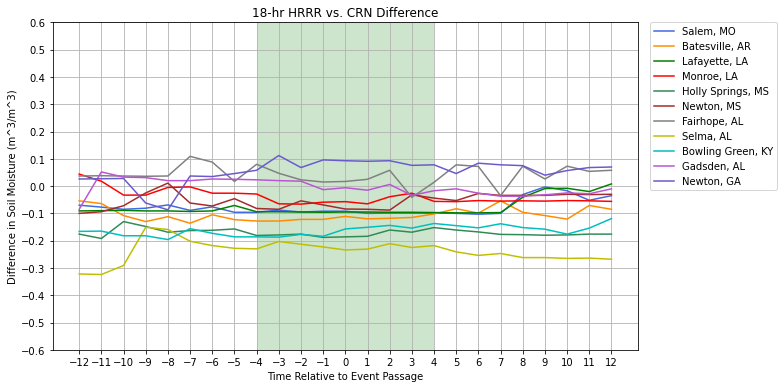

In [286]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff18_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff18_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff18_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff18_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff18_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff18_new,c='brown',label="Newton, MS")
#plt.plot(hour,diff18_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff18_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff18_sel,c='y',label="Selma, AL")
plt.plot(hour,diff18_bow,c='c',label="Bowling Green, KY")
plt.plot(hour,diff18_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff18_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-0.6, 0.7,0.1))
plt.ylim(-0.6, 0.6)
plt.title("18-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Soil Moisture (m^3/m^3)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()